In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import ExtraTreesRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, mean_squared_error

In [2]:
billing = pd.read_csv('NoSurpriseBillingER.csv')

In [3]:
billing.head()

,States,Billing Protections,Spending_Per_Person_ER,Out_of_Pocket_Spending_Per_Person_ER,Visits_Per_1000_People_ER,Average_Price_ER,Average_Out_of_Pocket_Price_ER,Percent of ER Visits with OON Providers,Malpractice payment amount per physician,Specialists per state,...,65+,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Cost of Living,Total HHI_Health Insurance,Total HHI_Hospital Inpatient Services
0,Arkansas,0,85.85,29.41,202.21,424.53,145.45,8.7,1754.84,52.22,...,17.3,42.0,5.4,26.2,15.9,1.4,9.1,86.9,3054,2739
1,California,1,233.12,46.62,126.25,1846.52,369.26,18.0,1693.24,52.89,...,14.9,48.0,6.6,25.3,11.4,0.9,7.8,151.7,2161,13407
2,Connecticut,1,240.31,60.05,165.11,1455.48,363.70,7.1,4810.00,56.83,...,17.7,52.9,4.8,21.5,14.1,0.7,5.9,127.7,2193,3136
3,Florida,1,241.76,56.06,194.89,1240.50,287.67,29.8,4936.99,53.04,...,21.1,40.3,9.5,17.4,18.0,1.7,13.1,97.9,2358,3382
4,Illinois,1,156.13,40.34,183.42,851.21,219.91,8.7,5711.64,49.65,...,16.0,54.6,5.2,18.2,14.1,0.7,7.3,94.5,3913,3898


In [4]:
billing.columns

Index(['States', 'Billing Protections', 'Spending_Per_Person_ER',
       'Out_of_Pocket_Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER',
       'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services'],
      dtype='object')

In [9]:
correlation_table = billing[['States', 'Billing Protections', 'Spending_Per_Person_ER',
       'Out_of_Pocket_Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER',
       'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']]

In [10]:
correlation_table.corr()

,Billing Protections,Spending_Per_Person_ER,Out_of_Pocket_Spending_Per_Person_ER,Visits_Per_1000_People_ER,Average_Price_ER,Average_Out_of_Pocket_Price_ER,Percent of ER Visits with OON Providers,Malpractice payment amount per physician,Specialists per state,White,...,65+,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Cost of Living,Total HHI_Health Insurance,Total HHI_Hospital Inpatient Services
Billing Protections,1.000000,0.312021,-0.131633,-0.560979,0.472854,0.236409,-0.053942,0.351715,0.059426,-0.319000,...,0.341763,0.163156,0.077613,0.023147,0.056044,-0.504167,-0.393656,0.762194,-0.416239,0.086674
Spending_Per_Person_ER,0.312021,1.000000,0.494189,-0.339441,0.847080,0.668649,0.142857,0.305898,0.149725,-0.153638,...,0.071736,0.214773,0.343611,-0.241048,-0.077333,-0.307677,-0.058069,0.376304,-0.242359,0.281851
Out_of_Pocket_Spending_Per_Person_ER,-0.131633,0.494189,1.000000,0.178392,0.273943,0.724601,0.259014,0.011256,-0.277765,0.235148,...,0.055352,0.033922,0.122674,-0.324531,0.117947,0.130542,0.378299,-0.178515,-0.007209,0.053222
Visits_Per_1000_People_ER,-0.560979,-0.339441,0.178392,1.000000,-0.755501,-0.538754,0.445587,0.028004,-0.112765,0.201714,...,0.155416,-0.462600,-0.272324,0.108908,0.385196,0.597451,0.522768,-0.718777,0.759017,-0.476902
Average_Price_ER,0.472854,0.847080,0.273943,-0.755501,1.000000,0.779078,-0.079252,0.144730,0.153018,-0.283283,...,-0.096551,0.318649,0.364275,-0.143528,-0.316607,-0.506492,-0.255028,0.660292,-0.539462,0.572638
Average_Out_of_Pocket_Price_ER,0.236409,0.668649,0.724601,-0.538754,0.779078,1.000000,-0.080627,-0.045952,-0.155404,0.041228,...,-0.079038,0.297817,0.285539,-0.298997,-0.178321,-0.278812,-0.019907,0.347705,-0.489428,0.447321
Percent of ER Visits with OON Providers,-0.053942,0.142857,0.259014,0.445587,-0.079252,-0.080627,1.000000,0.222827,0.110849,-0.420568,...,0.072961,-0.486827,0.063184,0.224478,0.078067,0.288219,0.484223,-0.177787,0.265021,0.050722
Malpractice payment amount per physician,0.351715,0.305898,0.011256,0.028004,0.144730,-0.045952,0.222827,1.000000,0.222861,-0.402511,...,0.026746,0.037435,-0.047784,0.106984,-0.099944,-0.459861,-0.089408,0.207449,-0.038690,-0.386810
Specialists per state,0.059426,0.149725,-0.277765,-0.112765,0.153018,-0.155404,0.110849,0.222861,1.000000,-0.304049,...,-0.333884,0.108983,0.007776,0.290802,-0.484977,-0.291623,-0.374906,0.276310,-0.132955,-0.113896
White,-0.319000,-0.153638,0.235148,0.201714,-0.283283,0.041228,-0.420568,-0.402511,-0.304049,1.000000,...,0.254286,0.189697,-0.209292,-0.320081,0.490551,0.135704,-0.114821,-0.440263,0.055635,-0.396368


In [11]:

billing.median()

C:\Users\589598\AppData\Local\Temp\1/ipykernel_22576/1167046430.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  billing.median()


Billing Protections                            1.00
Spending_Per_Person_ER                       191.91
Out_of_Pocket_Spending_Per_Person_ER          49.63
Visits_Per_1000_People_ER                    186.33
Average_Price_ER                             975.30
Average_Out_of_Pocket_Price_ER               263.40
Percent of ER Visits with OON Providers       12.30
Malpractice payment amount per physician    3600.36
Specialists per state                         52.89
White                                         65.70
Black                                         10.00
Hispanic                                      11.10
Asian                                          2.70
American Indian/Alaska Native                  0.30
Native Hawaiian/Other Pacific Islander         0.00
Multiple Races                                 2.40
Children 0-18                                 23.30
Adults 19-25                                   8.60
Adults 26-34                                  11.70
Adults 35-54

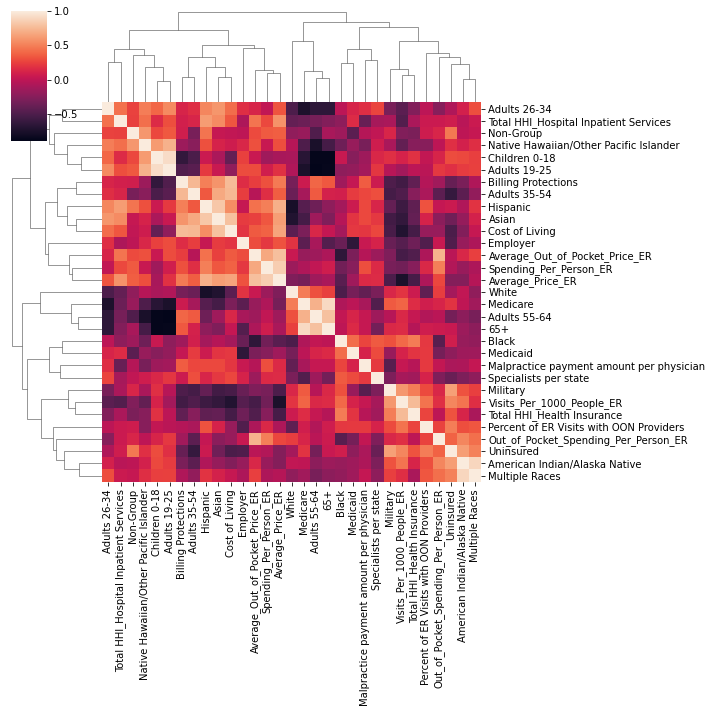

In [12]:
sns.clustermap(correlation_table.corr());

In [13]:
# Define X and y.
# 1st run
feature_cols = ['Out_of_Pocket_Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER', 'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Spending_Per_Person_ER'] 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
lr =LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [16]:
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3747813825874738, 'Average_Price_ER'),
 (0.09349156366117832, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.08627903272530288, 'Specialists per state'),
 (0.05437949163532082, 'Average_Out_of_Pocket_Price_ER'),
 (0.04753286505183831, 'Medicaid'),
 (0.0452442138961886, 'Cost of Living'),
 (0.03637257817120341, 'Total HHI_Health Insurance'),
 (0.03257511956768775, 'Native Hawaiian/Other Pacific Islander'),
 (0.0222066243341898, 'Black'),
 (0.022088152998737613, 'Malpractice payment amount per physician'),
 (0.017406989081584123, 'White'),
 (0.017291186600310433, 'Hispanic'),
 (0.0160788972688915, 'Adults 26-34'),
 (0.015683958571704334, 'Asian'),
 (0.015455535166025346, 'Adults 55-64'),
 (0.014681228858704614, 'Employer'),
 (0.012872070401358328, 'Non-Group'),
 (0.009140942216006564, 'Adults 19-25'),
 (0.008674905092575784, 'American Indian/Alaska Native'),
 (0.008348411548295876, '65+'),
 (0.007962688954863023, 'Percent of ER Visits with OON Providers'),
 (0.007744623448178615, 'Chil

In [18]:
# Define X and y.
# 2nd run
feature_cols = ['Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER', 'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Out_of_Pocket_Spending_Per_Person_ER'] 

In [19]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.4068210796534931, 'Average_Price_ER'),
 (0.09866606655777285, 'Average_Out_of_Pocket_Price_ER'),
 (0.07245401991550739, 'Spending_Per_Person_ER'),
 (0.06417048271729833, 'Specialists per state'),
 (0.0492364945985216, 'Cost of Living'),
 (0.029743267178773486, 'Medicaid'),
 (0.02807349813946656, 'Total HHI_Health Insurance'),
 (0.023721902798356797, 'Malpractice payment amount per physician'),
 (0.022128293990896383, 'Employer'),
 (0.019510720880530755, 'Adults 26-34'),
 (0.01906475528283792, 'Hispanic'),
 (0.017092859635597205, 'Black'),
 (0.015898883240059482, 'Native Hawaiian/Other Pacific Islander'),
 (0.015635987278652428, 'Non-Group'),
 (0.013429262743839885, 'White'),
 (0.012920439361215983, 'American Indian/Alaska Native'),
 (0.012182969499210952, 'Adults 55-64'),
 (0.010377696886481835, '65+'),
 (0.010304437344564193, 'Total HHI_Hospital Inpatient Services'),
 (0.008895821933808263, 'Multiple Races'),
 (0.007116063052883664, 'Asian'),
 (0.006323861527058323, 'Uninsured'),


In [24]:
# Define X and y.
# 3rd run
feature_cols = ['Spending_Per_Person_ER','Out_of_Pocket_Spending_Per_Person_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER', 'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Visits_Per_1000_People_ER'] 

In [25]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3895102573762223, 'Average_Price_ER'),
 (0.12267068356481353, 'Average_Out_of_Pocket_Price_ER'),
 (0.05300940905036202, 'Spending_Per_Person_ER'),
 (0.05103402393135816, 'Specialists per state'),
 (0.04022280198557116, 'Native Hawaiian/Other Pacific Islander'),
 (0.03947319131097201, 'Medicaid'),
 (0.03770275198790506, 'Malpractice payment amount per physician'),
 (0.03566835782749181, 'Cost of Living'),
 (0.02514704225128, 'Total HHI_Health Insurance'),
 (0.022544350103494905, 'Adults 26-34'),
 (0.02002195686404465, 'Employer'),
 (0.019689123782875975, 'Black'),
 (0.018253003420051248, 'White'),
 (0.01576576901361361, 'Hispanic'),
 (0.01430561118428662, 'Non-Group'),
 (0.011128205317249184, 'Military'),
 (0.010508354461266287, 'American Indian/Alaska Native'),
 (0.00927816492472565, 'Total HHI_Hospital Inpatient Services'),
 (0.0085317915035866, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.008258296573558168, 'Adults 19-25'),
 (0.007953900360307761, 'Uninsured'),
 (0.0078469490867

In [26]:
# Define X and y.
# 4th run
feature_cols = ['Visits_Per_1000_People_ER', 'Spending_Per_Person_ER','Out_of_Pocket_Spending_Per_Person_ER',
       'Average_Out_of_Pocket_Price_ER', 'Percent of ER Visits with OON Providers',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Average_Price_ER'] 

In [27]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.4182496749305749, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.10347324939799306, 'Average_Out_of_Pocket_Price_ER'),
 (0.0966564069877029, 'Visits_Per_1000_People_ER'),
 (0.06693249432665267, 'Specialists per state'),
 (0.03245918285806371, 'Total HHI_Health Insurance'),
 (0.03214938805811236, 'Cost of Living'),
 (0.03143238717846439, 'Medicaid'),
 (0.029750679465152075, 'Black'),
 (0.02137112075446614, 'Non-Group'),
 (0.018035845162309876, 'Adults 26-34'),
 (0.017192123567225225, 'Native Hawaiian/Other Pacific Islander'),
 (0.014690798090112374, 'White'),
 (0.01313908618595386, 'Malpractice payment amount per physician'),
 (0.012798092122389767, '65+'),
 (0.011960720944367228, 'Total HHI_Hospital Inpatient Services'),
 (0.011903712567969467, 'Hispanic'),
 (0.010789030579186946, 'American Indian/Alaska Native'),
 (0.0081659345403067, 'Adults 35-54'),
 (0.007540651341419907, 'Military'),
 (0.0065771291400285765, 'Asian'),
 (0.006095626178147077, 'Children 0-18'),
 (0.005393292775024

In [28]:
# Define X and y.
# 5th run
feature_cols = ['Visits_Per_1000_People_ER', 'Spending_Per_Person_ER','Out_of_Pocket_Spending_Per_Person_ER','Average_Price_ER'
       , 'Percent of ER Visits with OON Providers', 'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Average_Out_of_Pocket_Price_ER'] 

In [29]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.36443113232370816, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.11585216032804553, 'Average_Price_ER'),
 (0.08231690142407887, 'Visits_Per_1000_People_ER'),
 (0.0800818922908654, 'Specialists per state'),
 (0.04996419576007312, 'Cost of Living'),
 (0.02999358775986824, 'Medicaid'),
 (0.027522817700916528, 'Total HHI_Health Insurance'),
 (0.025601769085664354, 'Black'),
 (0.025321469197223487, 'Native Hawaiian/Other Pacific Islander'),
 (0.019135256141626308, 'Adults 26-34'),
 (0.01762549225072561, 'White'),
 (0.01619912709747112, 'American Indian/Alaska Native'),
 (0.0161122856449527, 'Malpractice payment amount per physician'),
 (0.015203456010509016, 'Hispanic'),
 (0.014749261706574613, 'Children 0-18'),
 (0.01260157010367423, 'Adults 55-64'),
 (0.011794254304622293, '65+'),
 (0.010838911288856883, 'Non-Group'),
 (0.0105124113771328, 'Employer'),
 (0.00801782382037188, 'Total HHI_Hospital Inpatient Services'),
 (0.007745617589372733, 'Adults 35-54'),
 (0.006925297171617135, 'Mult

In [31]:
# Define X and y.
# 6th run
feature_cols = ['Visits_Per_1000_People_ER', 'Percent of ER Visits with OON Providers', 
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Spending_Per_Person_ER'] 

In [32]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.40029116752310817, 'Malpractice payment amount per physician'),
 (0.10973177808405414, 'Specialists per state'),
 (0.07872411816209686, 'Visits_Per_1000_People_ER'),
 (0.0655189239471775, 'Hispanic'),
 (0.04134283587431088, 'Adults 19-25'),
 (0.0291721739233079, 'American Indian/Alaska Native'),
 (0.022804885577850924, 'Asian'),
 (0.02222952594549785, 'Uninsured'),
 (0.021181916740857502, 'Black'),
 (0.017763010613095025, '65+'),
 (0.017031227698499858, 'Medicare'),
 (0.016413825806760426, 'Native Hawaiian/Other Pacific Islander'),
 (0.010801255359092975, 'Adults 35-54'),
 (0.010299837539863108, 'Children 0-18'),
 (0.010166057385553475, 'Total HHI_Hospital Inpatient Services'),
 (0.010093244794279647, 'Military'),
 (0.008770261602191522, 'Medicaid'),
 (0.008337948309813326, 'Non-Group'),
 (0.006790124192646063, 'Cost of Living'),
 (0.006576316846409259, 'Total HHI_Health Insurance'),
 (0.006526986562509265, 'White'),
 (0.0061905421680247255, 'Adults 55-64'),
 (0.004461056039801993,